# <center> LAB 7 Newton Fractals – Groups </center>
### <center>  GRUPO 22 </center>
<center>Harold Alfredo Díaz Ortiz
<br> Sergio Camilo Espinosa Botero 
<br> Diego Felipe Sánchez Medina</center>

## **Teacher guides**

> ### Modification to plot a square in the complex plane with center in (z_c_r, z_c_i) and of size zw x zh 
<br/>
Modfied from Fractals with Python - The Newton Set <a href="https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/">link</a>
from the Fractals with Python series <a href="https://blog.anvetsu.com/tags/fractal">link</a>
<br/>
German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

## 1. Newton fractal for $p(z)=z^{8}+15z^{4}-16$



**Raices:**
<br/>
> $z=1\hphantom{Space}z=-1\hphantom{Space}z=i\hphantom{Space}z=-i \hphantom{Space} z=\sqrt{2}+\sqrt{2}i\hphantom{Space} \\
z=-\sqrt{2}-\sqrt{2}i\hphantom{Space}z=-\sqrt{2}+\sqrt{2}i\hphantom{Space}z=\sqrt{2}-\sqrt{2}i$



In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1
    r3 = complex(0,1)
    r4 = complex(0,-1)
    r5 = complex(math.sqrt(2),math.sqrt(2))
    r6 = complex(-math.sqrt(2),-math.sqrt(2))
    r7 = complex(-math.sqrt(2),math.sqrt(2))
    r8 = complex(math.sqrt(2),-math.sqrt(2))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)
            #print("zy:",zy)
            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)
                #print("zx:",zx)
                # Mapping real -> complex plane
                z = complex(zx, zy)
                #print("z:",z)
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                     # color green
                     pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                     # color blue
                     pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<=eps:
                     # color yellow
                     pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 0)
                elif abs(z-r5)<=eps:
                     # color fuchsia
                     pixels[height-y-1,x] = (255 - count*multcol, 0, 255 - count*multcol)
                elif abs(z-r6)<=eps:
                     # color aqua
                     pixels[height-y-1,x] = (0, 255 - count*multcol, 255 - count*multcol)
                elif abs(z-r7)<=eps:
                     # color gray
                     pixels[height-y-1,x] = (128 - count*multcol, 128 - count*multcol, 128 - count*multcol)
                elif abs(z-r8)<=eps:
                     # color purple
                     pixels[height-y-1,x] = (128 - count*multcol, 128 - count*multcol, 0)                
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

In [ ]:
def f(z):
    return z**8 + 15*z**4 - 16

def df(z):
    return 8*z**7 + 60*z**3

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=1)
    #plt.figure(figsize=(8,8))
    plt.title('Newton Fractal f(z) = z**8 + 15*z**4 - 16')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    #plt.axis('off')
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.75 , -0.75 ) to ( 0.75 , 0.75 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


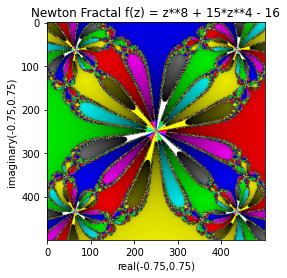

In [ ]:
print("zoom out")
#display1(zoom=1)
display1(zoom=1.5)
#display1(zoom=2)
#display1(zoom=3)
#display1(zoom=4)
#display1(zoom=5)

### Plot of $f(z)=  z^8 + 15z^4 - 16$ for the reals $f(x) = x^8 + 15x^4 - 16$

Text(0, 0.5, 'f(x)')

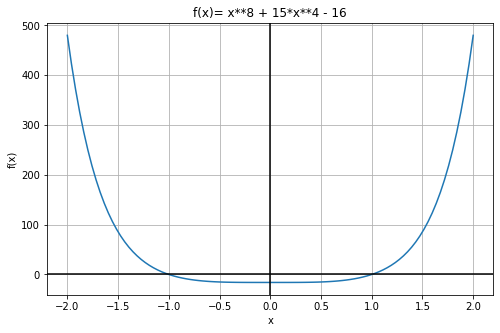

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= x**8 + 15*x**4 - 16')
plt.xlabel('x')
plt.ylabel('f(x)')

### Analysis

<table border="0">
 <tr>
    <td><b style="font-size:30px">Original Image</b></td>
    <td><b style="font-size:30px">Our Image</b></td>
 </tr>
 <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/en/0/06/Timelapse34.jpg" width="400"></td>
    <td><img src="https://i.ibb.co/fdn0hWh/Newton-Fractal-z8-15z4-16.png" width="300"></td>
 </tr>
</table>

---
---

## 2. Newton fractal for $p(z)=sin(z)$


**Raices:**
<br/>
> $z=2\pi\cdot n \hphantom{Space} z=\pi + 2\pi\cdot n \hphantom{Space} n\in \mathbb{Z} $
<br/>
<br/>
$\begin{aligned}
&n=-1&&:\hphantom{Space}z=-2\pi\hphantom{Space}&&z=-\pi \\
&n=0&&:\hphantom{Space} z=0\hphantom{Space}&&z=\pi \\
&n=1&&:\hphantom{Space} z=2\pi\hphantom{Space}&&z=3\pi \\
&n=2&&:\hphantom{Space} z=4\pi\hphantom{Space}&&z=5\pi
\end{aligned}$


In [ ]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1,r2 = root2(-1)
    r3,r4 = root2(0)
    r5,r6 = root2(1)
    r7,r8 = root2(2)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)
            #print("zy:",zy)
            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)
                #print("zx:",zx)
                # Mapping real -> complex plane
                z = complex(zx, zy)
                #print("z:",z)
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                     # color green
                     pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                elif abs(z-r3)<=eps:
                     # color blue
                     pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<=eps:
                     # color yellow
                     pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 0)
                elif abs(z-r5)<=eps:
                     # color fuchsia
                     pixels[height-y-1,x] = (255 - count*multcol, 0, 255 - count*multcol)
                elif abs(z-r6)<=eps:
                     # color aqua
                     pixels[height-y-1,x] = (0, 255 - count*multcol, 255 - count*multcol)
                elif abs(z-r7)<=eps:
                     # color gray
                     pixels[height-y-1,x] = (128 - count*multcol, 128 - count*multcol, 128 - count*multcol)
                elif abs(z-r8)<=eps:
                     # color purple
                     pixels[height-y-1,x] = (128 - count*multcol, 128 - count*multcol, 0)                
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

In [ ]:
def f(z):
    return cmath.sin(z)

def df(z):
    return cmath.cos(z)
  
def root2(n):
  root1 = (2*cmath.pi*n)
  root2 = cmath.pi + (2*cmath.pi*n)
  #print(root1)
  #print(root2)
  return root1, root2

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=1)
    #plt.figure(figsize=(8,8))
    plt.title('Newton Fractal f(z) = sin(z)')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    #plt.axis('off')
    plt.show()

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


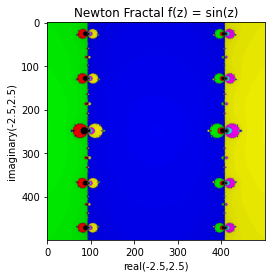

In [ ]:
print("zoom out")
#display1(zoom=1)
#display1(zoom=2)
#display1(zoom=3)
#display1(zoom=4)
display1(zoom=5)
#display1(zoom=10)

### Plot of $f(z)=sin(z)$ for the reals $f(x) = sin(x)$

Text(0, 0.5, 'f(x)')

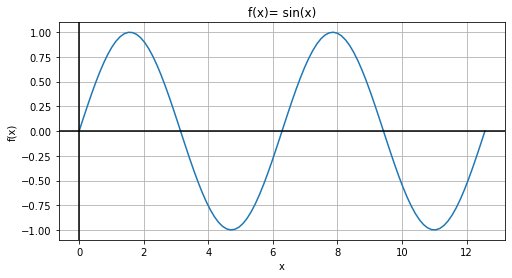

In [ ]:
x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(x,np.sin(x))
#ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

### Analysis

<table border="0">
 <tr>
    <td><b style="font-size:30px">Original Image</b></td>
    <td><b style="font-size:30px">Our Image</b></td>
 </tr>
 <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Sin%28x%29_detail.png/179px-Sin%28x%29_detail.png" width="90"></td>
    <td><img src="https://i.ibb.co/9pz5bMY/Newton-Fractal-sin-z.png" width="300"></td>
 </tr>
</table>

---
---

In this fractal, we can see convergences in 0 and pi, and even bigger in multipliers of pi/2, that are represented by circles. Each circle also has infinite circles on them. In the fractal we got, we see the same figure twice.

## 3. Newton fractal for $p(z)=z^{6}+z^{3}-1$


**Raices:**
<br/>
$x=\sqrt[3]{\frac{-1+\sqrt{5}}{2}} \hphantom{Space} x=-\frac{2^{\frac{2}{3}}\sqrt[3]{-1+\sqrt{5}}}{4}+i\frac{2^{\frac{2}{3}}\sqrt{3}\sqrt[3]{-1+\sqrt{5}}}{4} \hphantom{Space} x=-\frac{2^{\frac{2}{3}}\sqrt[3]{-1+\sqrt{5}}}{4}-i\frac{2^{\frac{2}{3}}\sqrt{3}\sqrt[3]{-1+\sqrt{5}}}{4}$
<br/>
<br/>
$x=\sqrt[3]{\frac{-1-\sqrt{5}}{2}} \hphantom{Space} x=-\frac{2^{\frac{2}{3}}\sqrt[3]{-1-\sqrt{5}}}{4}+i\frac{2^{\frac{2}{3}}\sqrt{3}\sqrt[3]{-1-\sqrt{5}}}{4} \hphantom{Space} x=-\frac{2^{\frac{2}{3}}\sqrt[3]{-1-\sqrt{5}}}{4}-i\frac{2^{\frac{2}{3}}\sqrt{3}\sqrt[3]{-1-\sqrt{5}}}{4}$



In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = ((-1+math.sqrt(5))/2)**(1/3)
    r2 = complex(-((2**(2/3))*((-1+math.sqrt(5))**(1/3))/4),((2**(2/3))*math.sqrt(3)*((-1+math.sqrt(5))**(1/3))/4))
    r3 = complex(-((2**(2/3))*((-1+math.sqrt(5))**(1/3))/4),-((2**(2/3))*math.sqrt(3)*((-1+math.sqrt(5))**(1/3))/4))
    r4 = ((-1-math.sqrt(5))/2)**(1/3)
    r5 = complex(-((2**(2/3))*((-1-math.sqrt(5))**(1/3))/4),((2**(2/3))*math.sqrt(3)*((-1-math.sqrt(5))**(1/3))/4))
    r6 = complex(-((2**(2/3))*((-1-math.sqrt(5))**(1/3))/4),-((2**(2/3))*math.sqrt(3)*((-1-math.sqrt(5))**(1/3))/4))

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)
            #print("zy:",zy)
            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)
                #print("zx:",zx)
                # Mapping real -> complex plane
                z = complex(zx, zy)
                #print("z:",z)
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                     # color green
                     pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                # elif abs(z-r3)<=eps:
                #      # color blue
                #      pixels[height-y-1,x] = (0, 0, 255 - count*multcol)
                elif abs(z-r4)<=eps:
                     # color yellow
                     pixels[height-y-1,x] = (255 - count*multcol, 255 - count*multcol, 0)
                elif abs(z-r5)<=eps:
                     # color fuchsia
                     pixels[height-y-1,x] = (255 - count*multcol, 0, 255 - count*multcol)
                elif abs(z-r6)<=eps:
                     # color aqua
                     pixels[height-y-1,x] = (0, 255 - count*multcol, 255 - count*multcol)
                # elif abs(z-r7)<=eps:
                #      # color gray
                #      pixels[height-y-1,x] = (128 - count*multcol, 128 - count*multcol, 128 - count*multcol)
                # elif abs(z-r8)<=eps:
                #      # color purple
                #      pixels[height-y-1,x] = (128 - count*multcol, 128 - count*multcol, 0)                
                else:   
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

In [ ]:
def f(z):
    return z**6 + z**3 - 1

def df(z):
    return 6*z**5 + 3*z**2

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=1)
    #plt.figure(figsize=(8,8))
    plt.title('Newton Fractal f(z) = z**6 + z**3 - 1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    #plt.axis('off')
    plt.show()

zoom out
Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


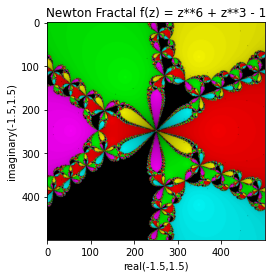

In [ ]:
print("zoom out")
#display1(zoom=1)
#display1(zoom=2)
display1(zoom=3)
#display1(zoom=4)
#display1(zoom=5)

### Plot of $f(z)=  z^6 + z^3 - 1$ for the reals $f(x) = x^6 + x^3 - 1$

Text(0, 0.5, 'f(x)')

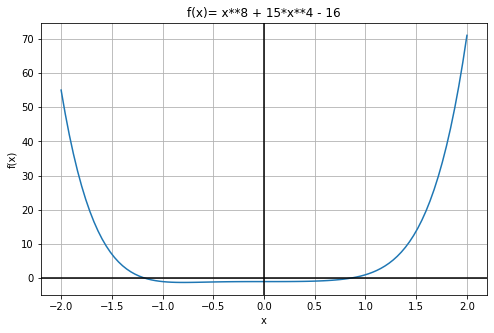

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= x**8 + 15*x**4 - 16')
plt.xlabel('x')
plt.ylabel('f(x)')

### Analysis

<table border="0">
 <tr>
    <td><b style="font-size:30px">Original Image</b></td>
    <td><b style="font-size:30px">Our Image</b></td>
 </tr>
 <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Newton_z6_z3.jmb.jpg/800px-Newton_z6_z3.jmb.jpg" width="400"></td>
    <td><img src="https://i.ibb.co/cQqQvff/Newton-Fractal-z6-z3-1.png" width="400"></td>
 </tr>
</table>

---
---
